# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

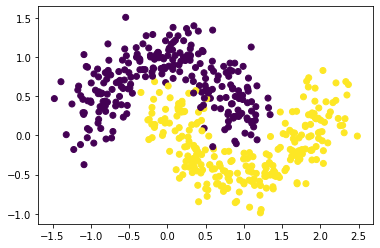

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(penalty='l2', C=0.05) # add some params
svm = SVC(kernel='linear', C=0.1) # here too

def plot_decisions(clf, X, y):
    fig = plt.figure(figsize=(10, 6))
    clf.fit(X, y)
    preds = clf.predict(X)
    print(f"Accuracy score of {clf} is {accuracy_score(y, preds)}")
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.show()

Accuracy score of LogisticRegression(C=0.05) is 0.836


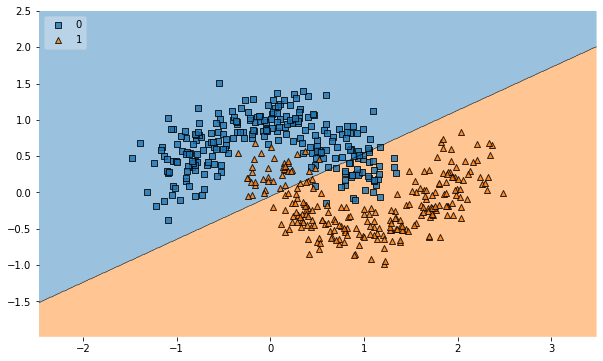

In [4]:
# logistic regression decision boundary
plot_decisions(lr, moons_points, moons_labels)

Accuracy score of SVC(C=0.1, kernel='linear') is 0.858


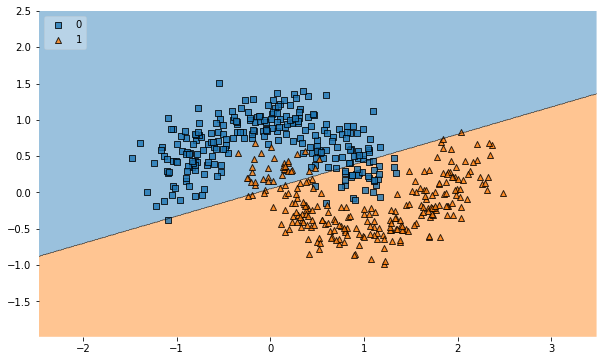

In [5]:
# SVM decision boundary
plot_decisions(svm, moons_points, moons_labels)

- decision boundary in both cases is not very good in separating classes, it looks practically the same, even though logistic regression maximises the likelihood and SVM maximises the margin. SVM is a little better in terms of accuracy

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Accuracy score of SVC(C=0.1, kernel='poly') is 0.808


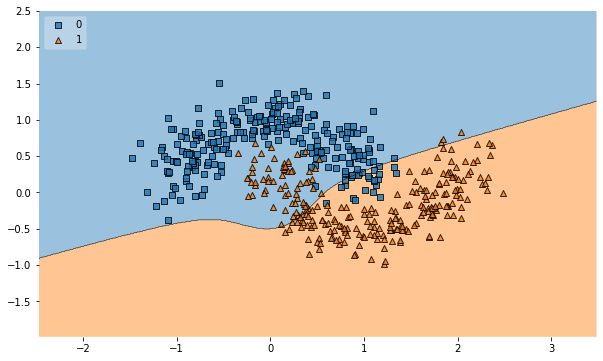

Accuracy score of SVC(C=0.1) is 0.946


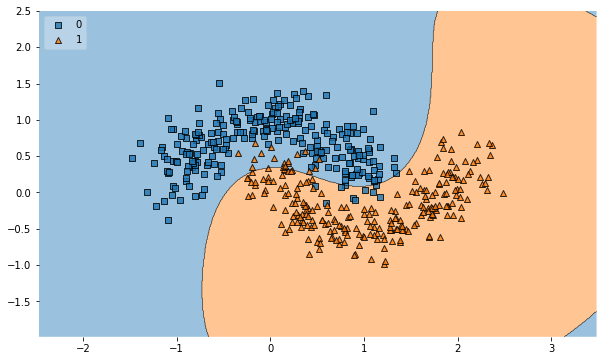

Accuracy score of SVC(C=0.1, kernel='sigmoid') is 0.712


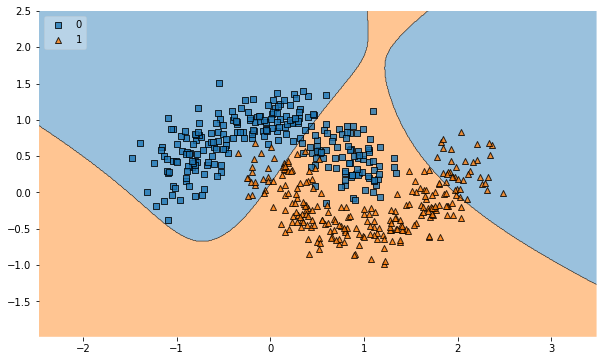

In [6]:
kernels = ['poly', 'rbf', 'sigmoid']

for k in kernels:
    svm = SVC(kernel=k, degree=3, C=0.1)
    plot_decisions(svm, moons_points, moons_labels)

- The best quality of classification is achieved with rbf kernel. Rbf kernel maps data to a higher dimensional space and the value of the RBF kernel decreases with distance so it can be interpreted as similarity measure.  
- In case of poly kernel interaction features allows decision boundary became a little concave in 2d space of original data, but this non-linearity does not improve quality, in fact the quality actually drops a little comparing to SVM with linear kernel. Rbf kernel's boundary is a curve in a 2d dimension space which repeats the half circled shape of data. Sigmoid kernel is equivalent to 2-layer perceptron where activation function add non-linearity to decision boundary. In this case it was not efficient enough for good separation of classes.
- I choose degree=3 for poly kernell because I didn't want to increase number of possible feature interactions too much and get an increasement in memory usage and computational time and on the other hand with degree=3 I would still see non-linear decision boundary in the original data dimension.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=5)),
                ('clf', LogisticRegression(C=0.05))]) is 0.932


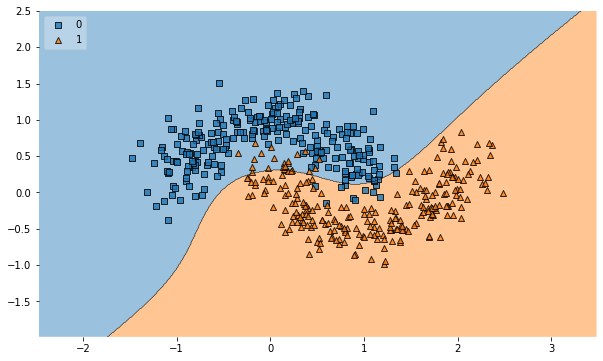

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=7)),
                ('clf', LogisticRegression(C=0.05))]) is 0.958


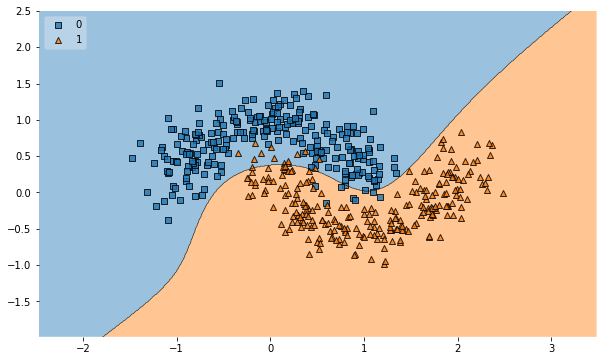

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=9)),
                ('clf', LogisticRegression(C=0.05))]) is 0.964


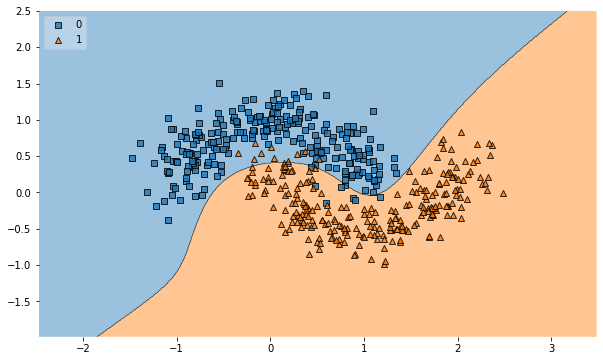

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

for num in range(5, 10, 2):
    pipe = Pipeline([('poly_transformation', PolynomialFeatures(num)), ('clf', LogisticRegression(penalty='l2', C=0.05))])
    plot_decisions(pipe, moons_points, moons_labels)

This solution is almost as good as SVM with rbf kernell and better than the rest kernels I used for SVM. Border type has convex at the right place and repeats the half circled shape of original data. Since SVM with poly kernell is somewhat similiar to polynomial regression and degree 3 which I used before was not enough to reproduce data nature I used higher degrees this time. It is not possible to be sure which degree would be the best, so I tried several of them. Degree = 9 gives the best quality among considered. The higher value might still be better but more expensive in terms of computation and memory usage.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

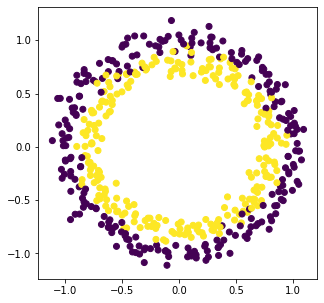

In [8]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

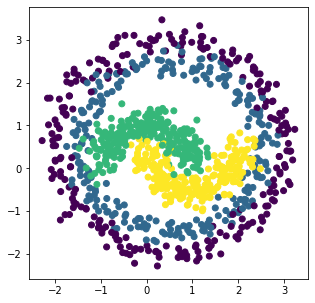

In [9]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Accuracy score of SVC(C=0.1, gamma='auto') is 0.896


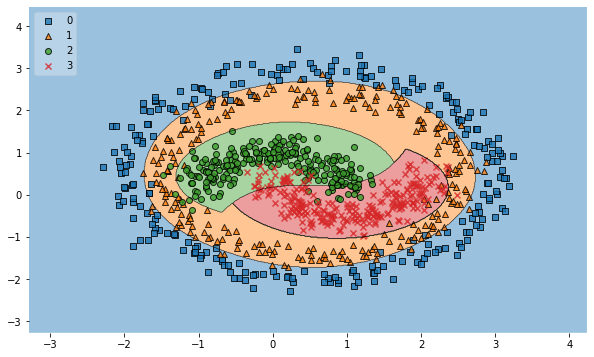

Accuracy score of SVC(C=0.5, gamma='auto') is 0.925


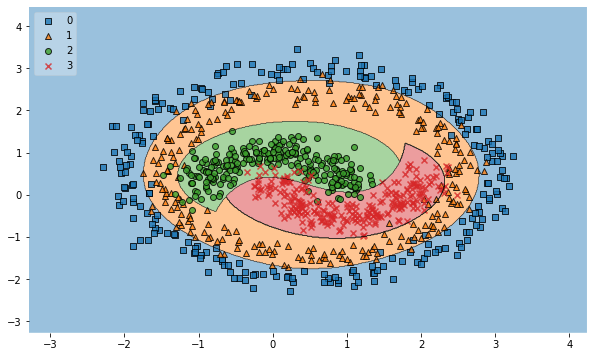

Accuracy score of SVC(C=1, gamma='auto') is 0.934


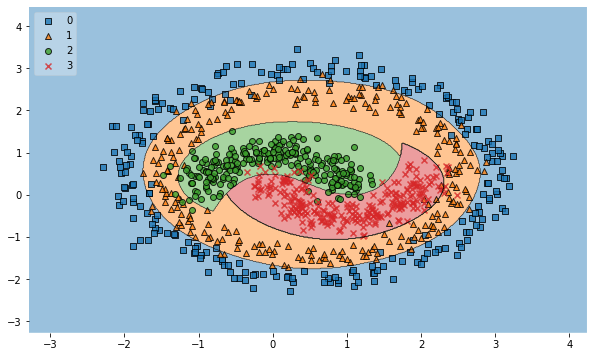

Accuracy score of SVC(C=1.5, gamma='auto') is 0.936


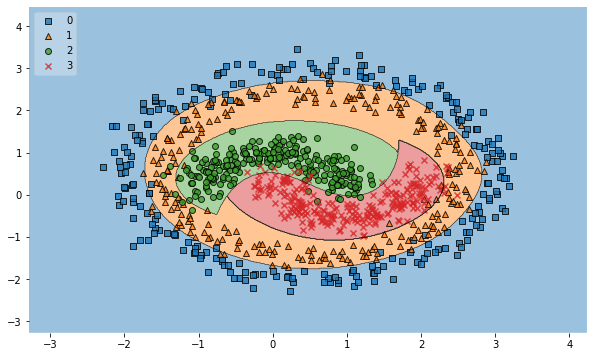

Accuracy score of SVC(C=2, gamma='auto') is 0.936


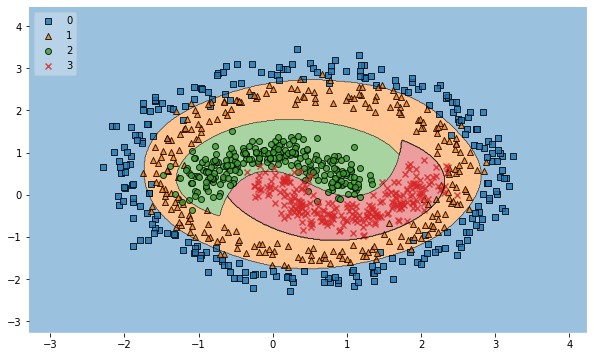

In [10]:
# SVM with diffrenent regularization
C = [0.1, 0.5, 1, 1.5, 2]

for c in C:
    svm = SVC(kernel='rbf', gamma='auto', C=c)
    plot_decisions(svm, points, labels)

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures()),
                ('clf', LogisticRegression(C=0.05))]) is 0.86


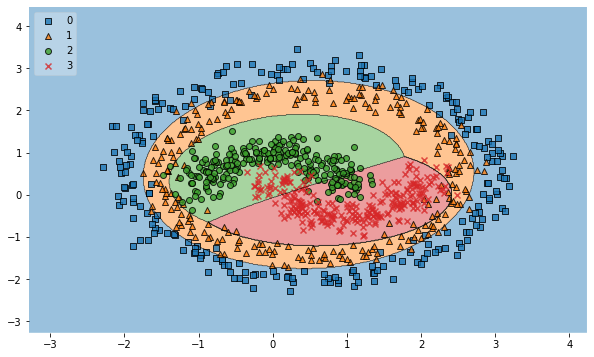

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=4)),
                ('clf', LogisticRegression(C=0.05))]) is 0.904


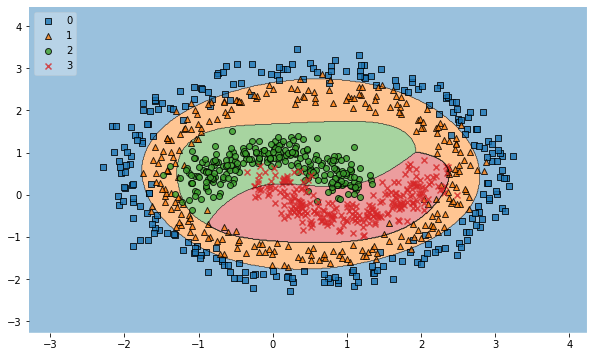

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=6)),
                ('clf', LogisticRegression(C=0.05))]) is 0.903


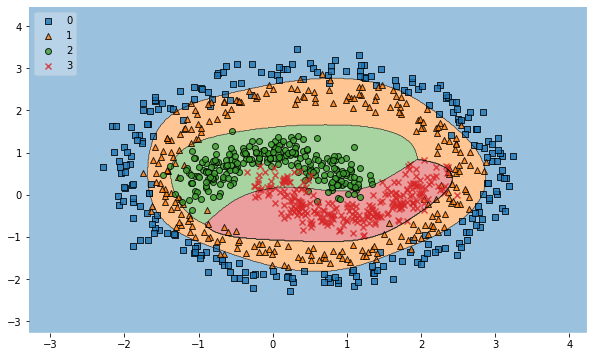

Accuracy score of Pipeline(steps=[('poly_transformation', PolynomialFeatures(degree=8)),
                ('clf', LogisticRegression(C=0.05))]) is 0.826


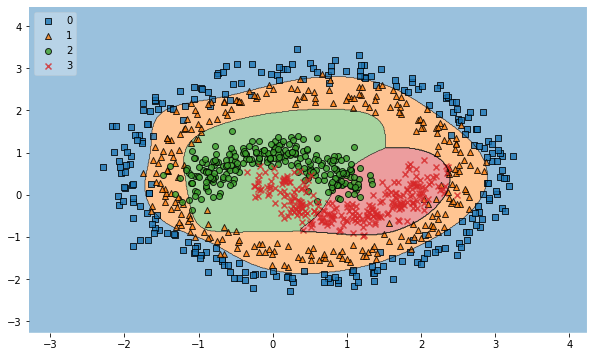

In [11]:
for num in range(2, 10, 2):
    pipe = Pipeline([('poly_transformation', PolynomialFeatures(num)), ('clf', LogisticRegression(penalty='l2', C=0.05))])
    plot_decisions(pipe, points, labels)

* Since I obviously need a non-linear desicion boundary and part of the classes (the moon-shaped data) was well separated with rbf kernel before, I choose to use only it with different regularization parameters. Best score was 0.936 and was achieved with C=1.5 which means that less strict regularization works better here. Decreasing regularization even more did not improve quality.
* For the logistic regression model I tried different powers of polynomial features without trying very big numbers for reasons I described above. Best achieved score was 0.904 with power 4. Based on decision boundary plot it seems that more difficult task for logistic regression classification for considered parameters were moon-shaped classes.  